In [64]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import kaggle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [65]:
# Download and update dataset
dataset = 'adrianjuliusaluoch/hourly-crypto-stocks-market-data'
csv_file = 'stocks.csv'

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset, path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/adrianjuliusaluoch/hourly-crypto-stocks-market-data


In [66]:
# Read financial dataset and initial assessment
df = pd.read_csv("stocks.csv")
df = df.query("name != 'Citigroup'")
df.head()
df.info()
df.describe()
df.tail()
df['name'].nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 170401 entries, 0 to 172317
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  170401 non-null  object 
 1   name       170401 non-null  object 
 2   last       170401 non-null  float64
 3   high       170401 non-null  float64
 4   low        170401 non-null  float64
 5   chg_       170401 non-null  float64
 6   chg_%      170401 non-null  object 
 7   vol_       170401 non-null  object 
 8   time       170401 non-null  object 
dtypes: float64(4), object(5)
memory usage: 13.0+ MB


30

In [67]:
# Pre-clean dataset
df.head(10)

,timestamp,name,last,high,low,chg_,chg_%,vol_,time
0,2025-10-12 22:30:00,Boeing,210.73,217.90,210.73,-5.27,-2.44%,10.65M,10/10
1,2025-10-12 22:00:00,Apple,245.27,256.38,244.00,-8.77,-3.45%,62M,10/10
2,2025-10-12 22:00:00,Cisco,67.94,70.81,67.89,-2.02,-2.89%,20.96M,10/10
3,2025-10-12 22:00:00,Sherwin-Williams,332.81,337.86,331.72,-0.41,-0.12%,2.42M,10/10
4,2025-10-12 22:00:00,Walmart,101.84,103.63,101.52,0.07,+0.07%,18.52M,10/10
5,2025-10-12 22:00:00,J&amp;J,190.72,192.07,189.85,-0.36,-0.19%,9.6M,10/10
6,2025-10-12 22:00:00,Home Depot,375.75,380.26,374.78,-1.94,-0.51%,2.99M,10/10
7,2025-10-12 22:00:00,Amazon.com,216.37,228.25,216.00,-11.37,-4.99%,72.37M,10/10
8,2025-10-12 22:00:00,P&amp;G,149.69,151.51,149.45,-0.89,-0.59%,7.37M,10/10
9,2025-10-12 22:00:00,NVIDIA,183.16,195.62,182.05,-9.41,-4.89%,268.77M,10/10


In [68]:
# Cleaning and preprocessing dataset

df = df.dropna()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['name'] = df['name'].str.replace('&amp;', '&')

df['chg_%'] = df['chg_%'].str.replace('%', '')
df['chg_%'] = df['chg_%'].astype('float')

def parse_volume(vol):
    vol = vol.replace('M', 'e6').replace('K', 'e3')
    return float(eval(vol))

df['vol_'] = df['vol_'].apply(parse_volume)
df.head(10)
# Post-clean dataset


,timestamp,name,last,high,low,chg_,chg_%,vol_,time
0,2025-10-12 22:30:00,Boeing,210.73,217.90,210.73,-5.27,-2.44,10650000.0,10/10
1,2025-10-12 22:00:00,Apple,245.27,256.38,244.00,-8.77,-3.45,62000000.0,10/10
2,2025-10-12 22:00:00,Cisco,67.94,70.81,67.89,-2.02,-2.89,20960000.0,10/10
3,2025-10-12 22:00:00,Sherwin-Williams,332.81,337.86,331.72,-0.41,-0.12,2420000.0,10/10
4,2025-10-12 22:00:00,Walmart,101.84,103.63,101.52,0.07,0.07,18520000.0,10/10
5,2025-10-12 22:00:00,J&J,190.72,192.07,189.85,-0.36,-0.19,9600000.0,10/10
6,2025-10-12 22:00:00,Home Depot,375.75,380.26,374.78,-1.94,-0.51,2990000.0,10/10
7,2025-10-12 22:00:00,Amazon.com,216.37,228.25,216.00,-11.37,-4.99,72370000.0,10/10
8,2025-10-12 22:00:00,P&G,149.69,151.51,149.45,-0.89,-0.59,7370000.0,10/10
9,2025-10-12 22:00:00,NVIDIA,183.16,195.62,182.05,-9.41,-4.89,268770000.0,10/10


In [69]:
df['name'].unique()

array(['Boeing', 'Apple', 'Cisco', 'Sherwin-Williams', 'Walmart', 'J&J',
       'Home Depot', 'Amazon.com', 'P&G', 'NVIDIA', 'Visa A', 'Nike',
       'Salesforce Inc', 'JPMorgan', 'Travelers', 'Walt Disney', 'IBM',
       'Honeywell', 'Merck&Co', 'Amgen', 'Chevron', 'Caterpillar',
       'Goldman Sachs', 'Microsoft', 'Verizon', 'Coca-Cola',
       'UnitedHealth', 'American Express', '3M', 'McDonald’s'],
      dtype=object)

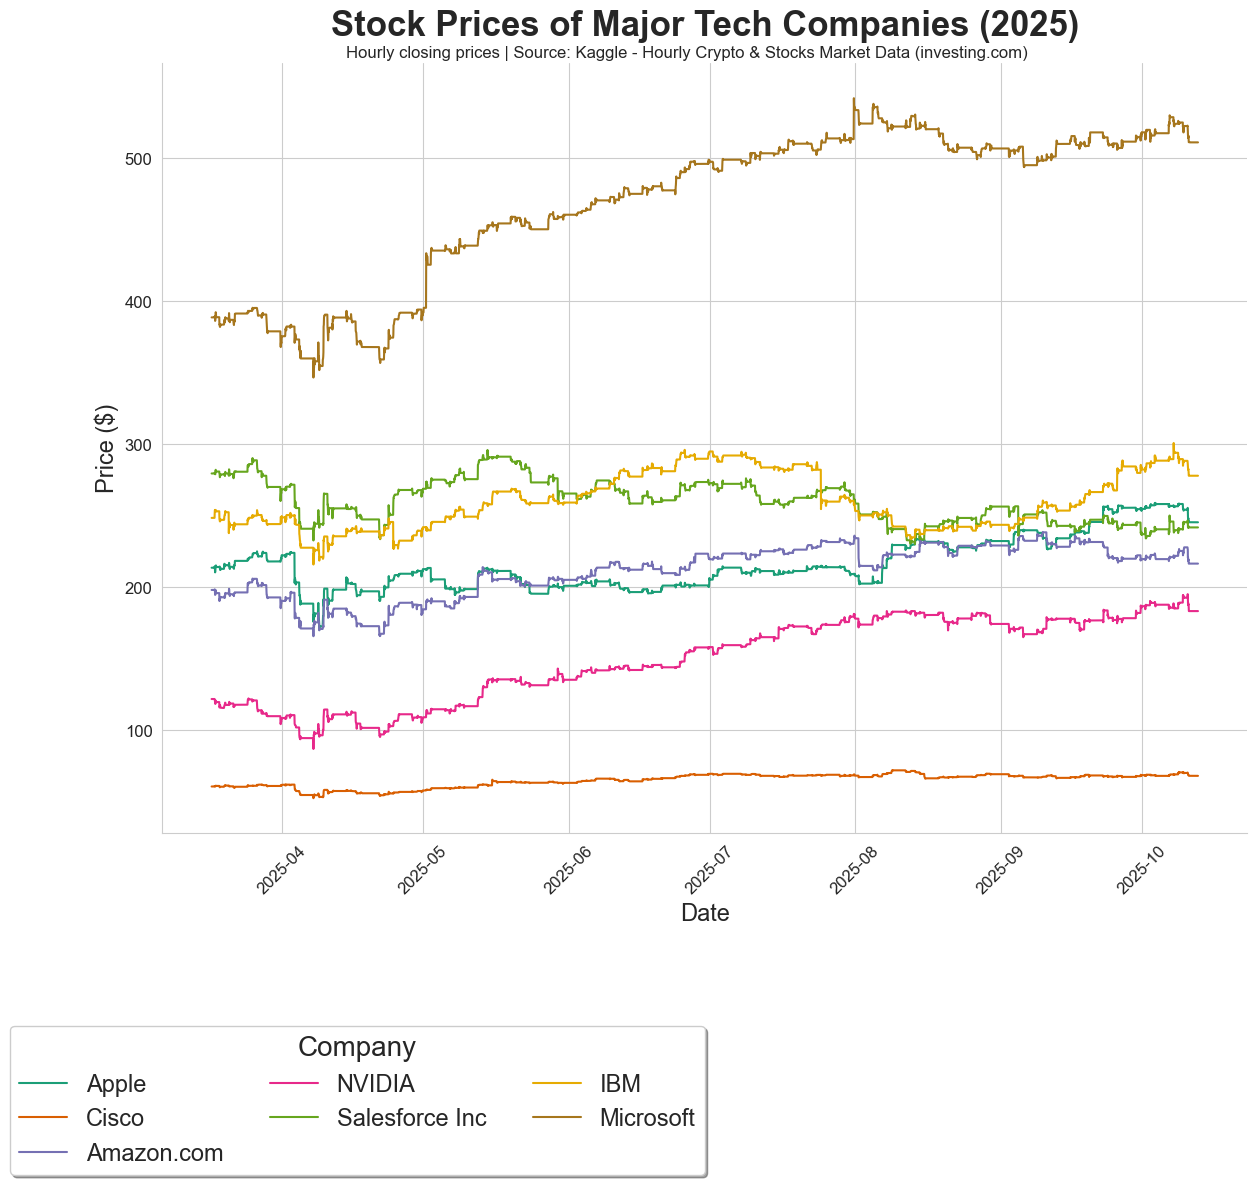

In [70]:
# Visualization #1: Major technology company stock prices over 2025

tech_comps = [
    'Microsoft',
    'Apple',
    'NVIDIA',
    'Amazon.com',
    'Cisco',
    'IBM',
    'Salesforce Inc'
]
df_tech = df[df['name'].isin(tech_comps)]

sns.set_style('whitegrid')
sns.set_palette('Dark2')
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_tech, x='timestamp', y='last', hue='name')
plt.title('Stock Prices of Major Tech Companies (2025)', fontsize=25, weight='bold', pad=20)
plt.suptitle('Hourly closing prices | Source: Kaggle - Hourly Crypto & Stocks Market Data (investing.com)', fontsize=12, y=0.898)
plt.xlabel('Date', fontsize = 17)
plt.ylabel('Price ($)', fontsize = 17)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(
    title = 'Company', 
    loc='best',
    bbox_to_anchor=(0.5, -.25),
    ncol = 3,
    fancybox=True,
    shadow = True,
    borderaxespad=0,
    fontsize = 17,
    title_fontsize = 20
    )
sns.despine()
plt.show()


C:\Users\eddie\AppData\Local\Temp\ipykernel_22544\1569879285.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_growth, x='name', y='growth', palette='Dark2')


Text(0, 0.5, 'Price ($)')

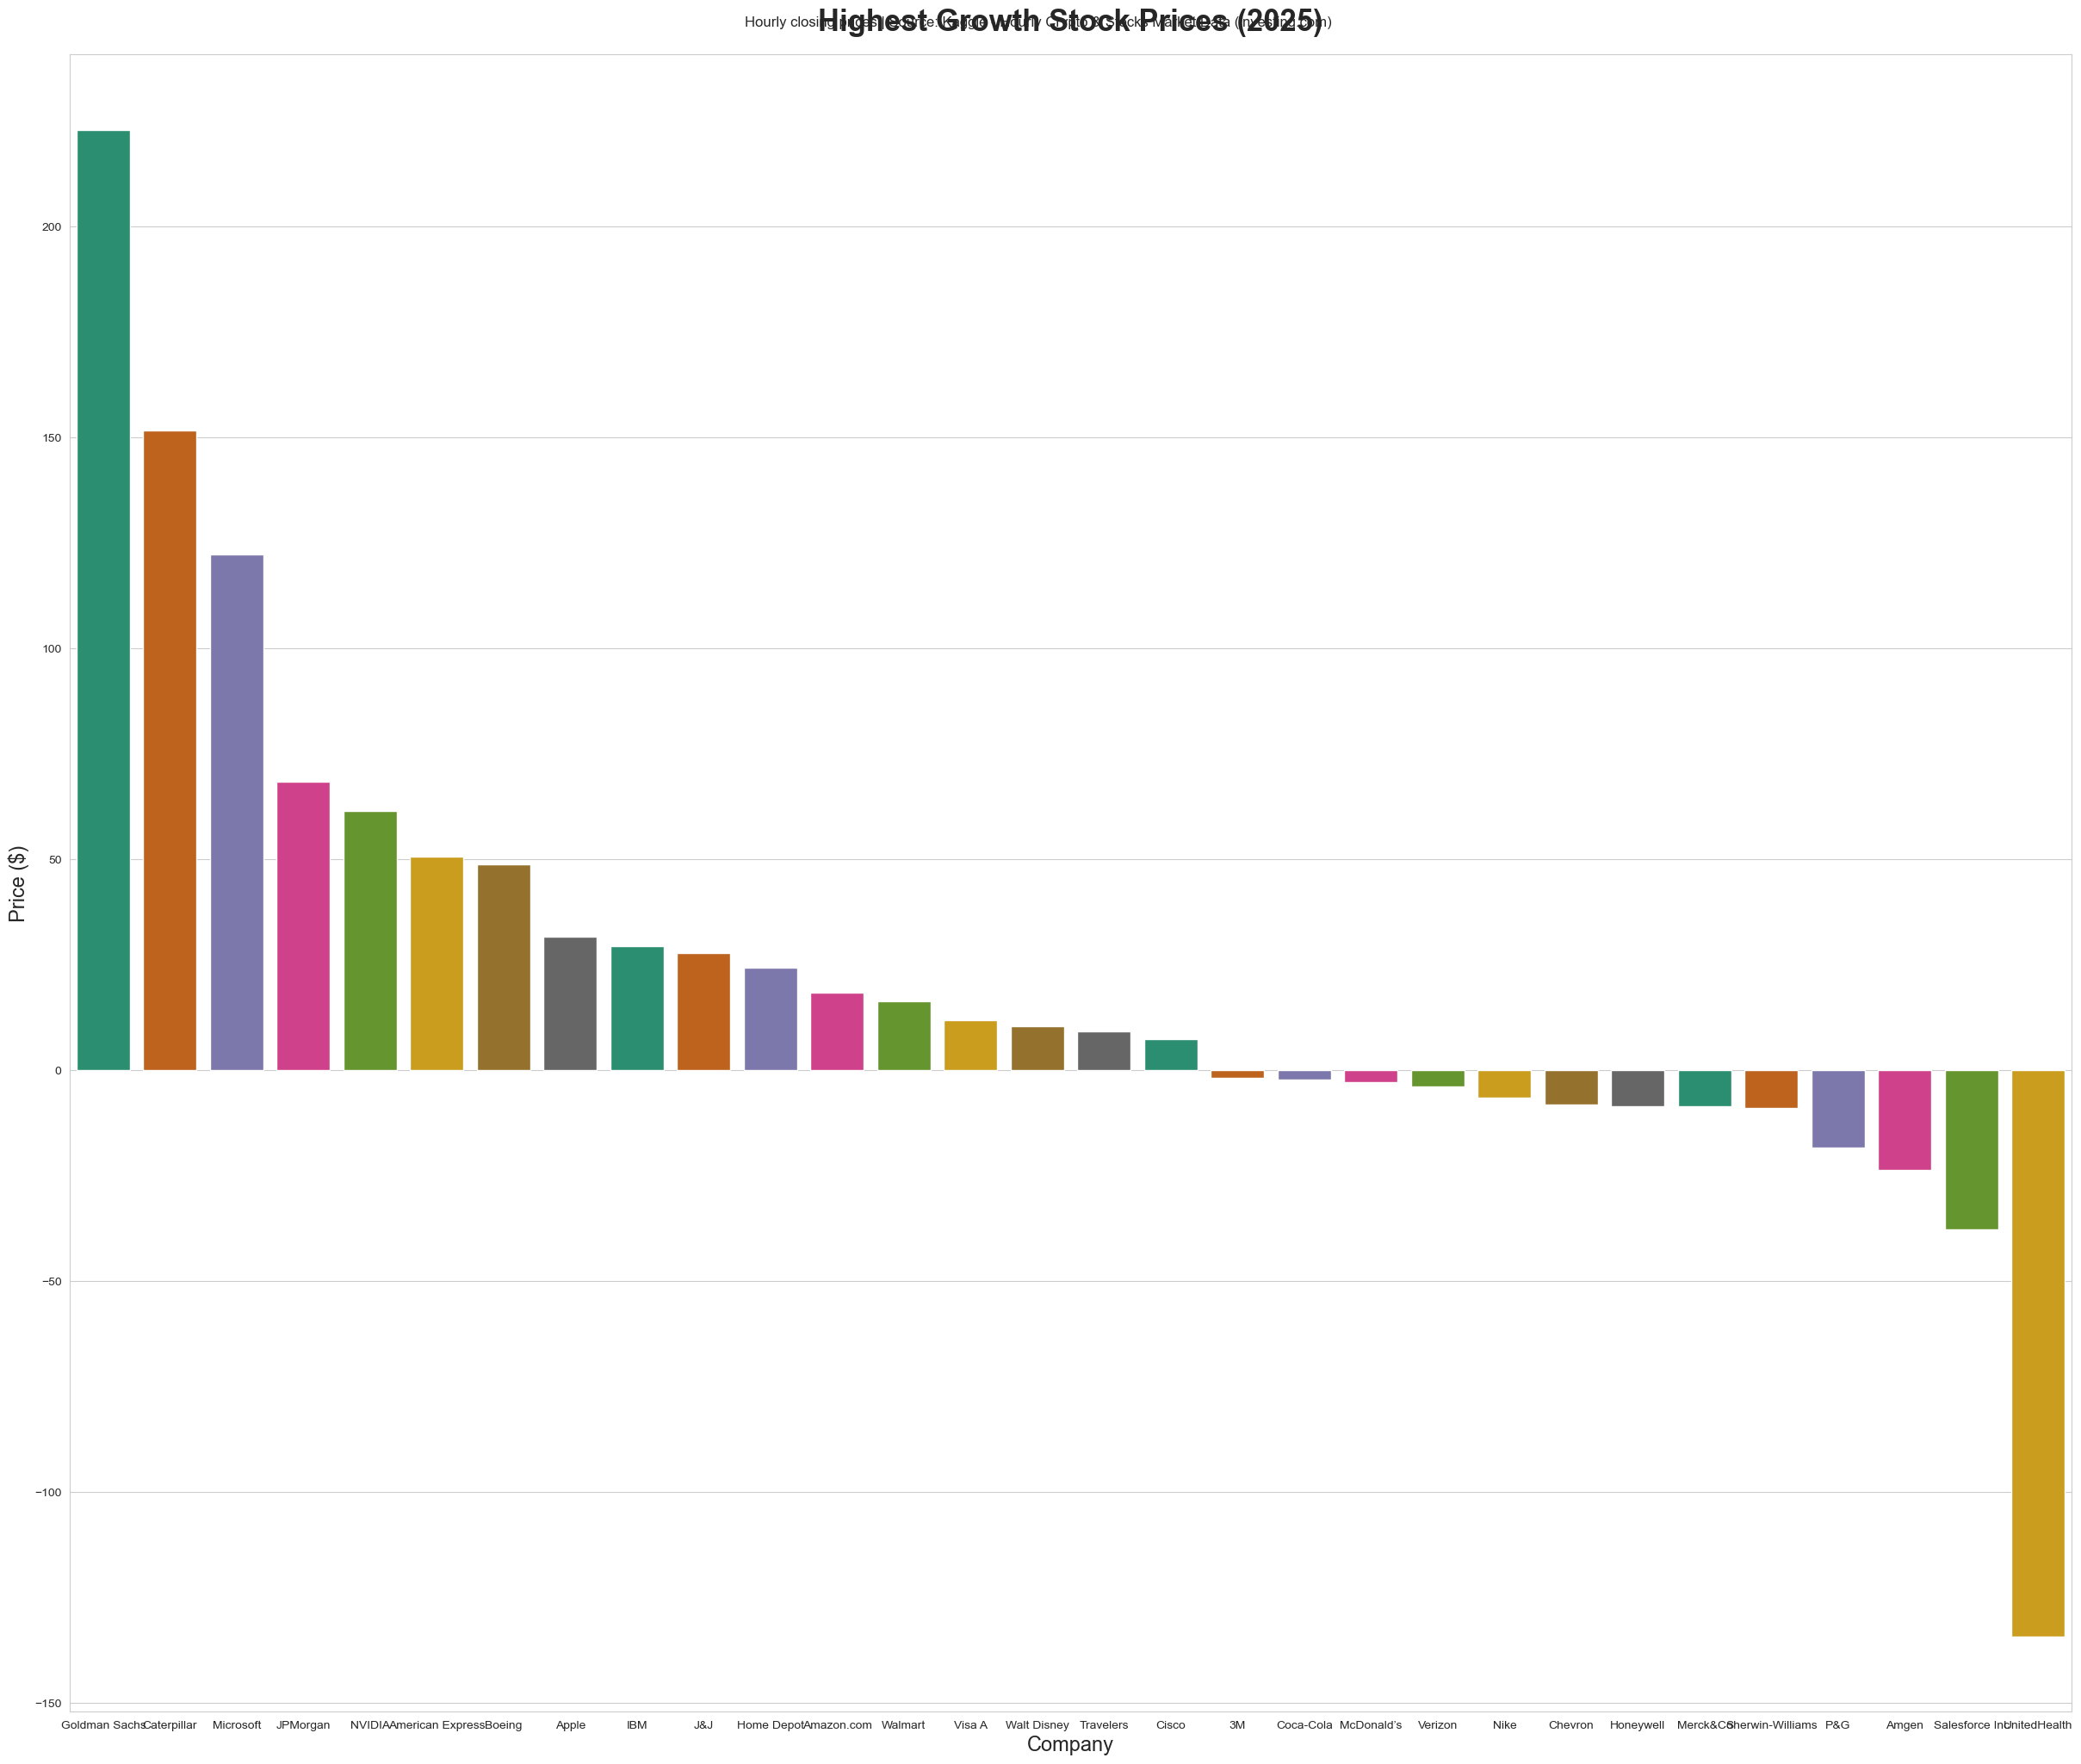

In [109]:
#  Visualization #2 - Highest growth stock prices over 2025

df_sorted = df.sort_values(by=['name', 'timestamp'])
first_close = df_sorted.groupby('name').first()
last_close = df_sorted.groupby('name').last()
changes = last_close['last'] - first_close['last']
changes = changes.sort_values(ascending=False)
df_growth = changes.reset_index()
df_growth.columns = ['name', 'growth']
df_growth

sns.set_style('whitegrid')
sns.set_palette('Dark2')
plt.figure(figsize=(30, 25))
sns.barplot(data=df_growth, x='name', y='growth', palette='Dark2')
plt.title('Highest Growth Stock Prices (2025)', fontsize=25, weight='bold', pad=20)
plt.suptitle('Hourly closing prices | Source: Kaggle - Hourly Crypto & Stocks Market Data (investing.com)', fontsize=12, y=0.898)
plt.xlabel('Company', fontsize = 17)
plt.ylabel('Price ($)', fontsize = 17)

SyntaxError: unmatched ']' (1890416573.py, line 1)